# HW1 Linear regression and Newton's method

### input data

- File name : file contained mulit pairs (x,y)
- N : the number of polynomial of basis
- Lambda : rLSE parameter

### output

- vector : contain polynomail parameters (length : N)
- error : rLSE or LSE
- polynomial equation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

In [2]:
# MatrixOP at ./MatrixOP.py
from MatrixOP import *

In [28]:
# Polynomial at ./Polynomial.py
from Polynomial import *

In [4]:
def convert_data_Ab(datas, N):
    # create matrix
    A = [];
    b = [];

    for index, row in datas.iterrows():
        b.append([row['y']])
        A.append([basis(row['x'], (N - 1) - i) for i in range(N)])
    
    return (A,b)

def linear_regression(datas, N = 2, Lambda = 1.0):
    A,b = convert_data_Ab(datas, N)
    
    ATA = mul_matrix(tranpose_matrix(A), A)
    ATA_Lambda = add_matrix(ATA, mul_matrix_scalar(Lambda, unit_matrix(N)))
    x_vector = mul_matrix( inverse_matrix(ATA_Lambda), tranpose_matrix(A))
    x_vector = mul_matrix(x_vector, b)
    
    return x_vector;

In [5]:
# config

input_file = "data.csv";
N = 4;
Lambda = 1.0;

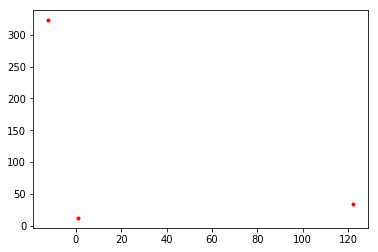

,x,y
0,1,12
1,122,34
2,-12,323


In [6]:
# load input and show data points

input_data = pd.read_csv(input_file, header=None, names=['x', 'y'])
plt.plot(input_data['x'], input_data['y'], 'r.')
plt.show()
input_data

In [7]:
# create matrix

A = [];
x_vector = [[0] for _ in range(N)];
b = [];

for index, row in input_data.iterrows():
    b.append([row['y']])
    A.append([basis(row['x'], (N - 1) - i) for i in range(N)])

In [8]:
pd.DataFrame(A)

,0,1,2,3
0,1,1,1,1
1,1815848,14884,122,1
2,-1728,144,-12,1


In [9]:
pd.DataFrame(x_vector)

,0
0,0
1,0
2,0
3,0


In [10]:
pd.DataFrame(b)

,0
0,12
1,34
2,323


In [31]:
ATA = mul_matrix(tranpose_matrix(A), A)
ATA_Lambda = add_matrix(ATA, mul_matrix_scalar(Lambda, unit_matrix(N)))
x_vector = mul_matrix( inverse_matrix(ATA_Lambda), tranpose_matrix(A))
x_vector = mul_matrix(x_vector, b)

In [32]:
x_vector = linear_regression(input_data, 3)

In [33]:
pd.DataFrame(x_vector)

,0
0,0.188303
1,-22.848022
2,18.779456


In [34]:
answer_line = polynomial_equation(x_vector)

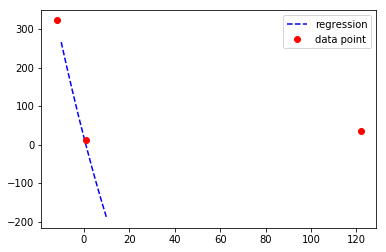

In [35]:
x_range = [i/100 for i in range(-1000,1000)]
y_range = [answer_line.f(x) for x in x_range]
plt.plot(x_range, y_range, 'b--', label='regression')
plt.plot(input_data['x'], input_data['y'], 'ro', label='data point')
plt.legend()
plt.show()

# Gen data from sin function with noise

In [37]:
import random
import math
x_range = [i/100 for i in range(0,700)]
sin_data = []
random_dis = [random.random() for i in range(10)]
random_dis = [sum(random_dis[0:i+1])/sum(random_dis) for i in range(9)]

for i in random_dis:
    x = x_range[round(i*len(x_range))]
    y = math.sin(x) * (0.9 + 0.2*random.random())
    sin_data.append([x,y])

In [38]:
input_data_sin = pd.DataFrame(sin_data)
input_data_sin.columns = ['x', 'y']
input_data_sin

,x,y
0,0.93,0.771175
1,1.24,0.961645
2,2.02,0.957316
3,2.50,0.607980
4,3.16,-0.018968
5,4.04,-0.823714
6,4.15,-0.919568
7,4.50,-0.913314
8,5.42,-0.834870


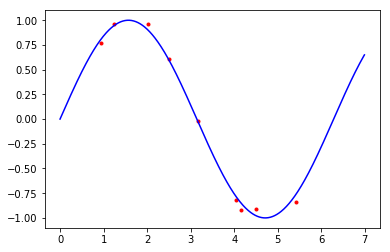

,x,y
0,1,12
1,122,34
2,-12,323


In [39]:
#input_data = pd.read_csv(input_file, header=None, names=['x', 'y'])
plt.plot(input_data_sin['x'], input_data_sin['y'], 'r.')
plt.plot(x_range, [math.sin(x) for x in x_range], 'b')
plt.show()
input_data

# Linear regression

[[0.12455935899980933], [-1.187169485491739], [2.7907474836419093], [-0.8970307695194585]]


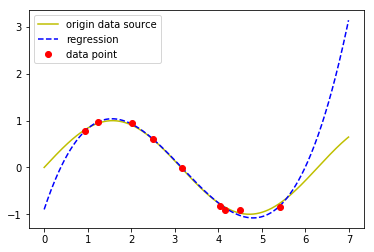

In [40]:
x_vector = linear_regression(input_data_sin, 4, 0)
print(x_vector)
answer_line = polynomial_equation(x_vector)
y_range = [answer_line.f(x) for x in x_range]
plt.plot(x_range, [math.sin(x) for x in x_range], 'y', label='origin data source')
plt.plot(x_range, y_range, 'b--', label='regression')
plt.plot(input_data_sin['x'], input_data_sin['y'], 'ro', label='data point')
plt.legend()
plt.show()

In [41]:
Latex(str(answer_line))

<IPython.core.display.Latex object>

In [42]:
answer_line.rLSE(input_data_sin['x'], input_data_sin['y'], 0)

0.02050344082739898

## Newton's method in optimization

use n=2 Taylor series and newton's method for optimization

$$ \\
x_1 = x_{0} - \frac{f^{'}(x_0)}{f^{''}(x_0)} $$

can present this format when high dimension

$$ \\
\vec{x_1} = \vec{x_0} - Hf(\vec{x_0})^{-1} \nabla f(\vec{x_0}) \\
Hf(x_0)^{-1} = 
\left [ \begin{array}{cc} 
\frac{\partial^2f}{\partial {x_0}^2} & \frac{\partial^2f}{\partial {x_0}{x_1}} & \cdots & \frac{\partial^2f}{\partial {x_0}{x_n}} \\
\frac{\partial^2f}{\partial {x_1}{x_0}} & \frac{\partial^2f}{\partial {x_1}^2} & \cdots & \frac{\partial^2f}{\partial {x_1}{x_n}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2f}{\partial {x_n}{x_0}} & \frac{\partial^2f}{\partial {x_n}{x_1}} & \cdots & \frac{\partial^2f}{\partial {x_n}^2} 
\end{array} \right ]$$

### LSE

$$ \\
LSE = f(x) = ||A\vec{x}-\vec{b}||^2 = x^TA^TA\vec{x} - 2x^TA^T\vec{b} + \vec{b}^T\vec{b} \\
\nabla f(\vec{x}) = f^{'}(x) = 2A^TA\vec{x} - 2A^T\vec{b}\\
Hf(\vec{x}) = f^{''}(x) = 2A^TA \\
\\
\vec{x_1} = \vec{x_0} - (2A^TA)^{-1}(2A^TA\vec{x_0} - 2A^T\vec{b}) \\
$$

In [43]:
def inter_newton(x0, A, b):
    AT = tranpose_matrix(A)
    hession = mul_matrix(mul_matrix_scalar(2, AT), A)
    inverse_hession = inverse_matrix(hession)
    nabla = sub_matrix(mul_matrix(hession, x0), mul_matrix(mul_matrix_scalar(2,AT), b))
    x_gradient = mul_matrix(inverse_hession, nabla)
    x1 = sub_matrix(x0, x_gradient)
    return x1

def newton(datas, N = 2, delta = 0.001, x_init = None, over_iter = 2):
    A,b = convert_data_Ab(datas, N)
    
    if (x_init != None):
        x_old = [[x_init[i][0]] for i in range(N)]
    else:
        x_old = [[0] for _ in range(N)]
    
    while True:
        x_new = inter_newton(x_old, A, b)
        
        x_delta = sub_matrix(x_new, x_old)
        x_delta = mul_matrix(tranpose_matrix(x_delta), x_delta)
        
        if x_delta[0][0] < delta:
            if over_iter <= 0:
                break
            else:
                over_iter = over_iter - 1
        
        x_old = x_new
    
    return x_new

[[0.12455935899987478], [-1.187169485492409], [2.790747483643854], [-0.8970307695208991]]


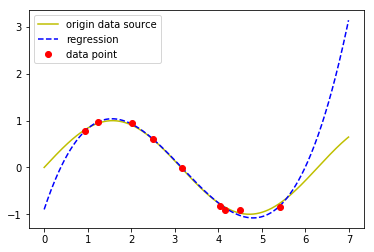

In [44]:
x_newton = newton(input_data_sin, 4)
print(x_newton)
answer_line_newton = polynomial_equation(x_newton)
y_range = [answer_line_newton.f(x) for x in x_range]
plt.plot(x_range, [math.sin(x) for x in x_range], 'y', label='origin data source')
plt.plot(x_range, y_range, 'b--', label='regression')
plt.plot(input_data_sin['x'], input_data_sin['y'], 'ro', label='data point')
plt.legend()
plt.show()

In [45]:
Latex(str(answer_line_newton))

<IPython.core.display.Latex object>

In [46]:
answer_line_newton.rLSE(input_data_sin['x'], input_data_sin['y'], 0)

0.02050344082739835

In [47]:
Latex(str(answer_line))

<IPython.core.display.Latex object>

In [48]:
answer_line_newton.rLSE(input_data_sin['x'], input_data_sin['y'], 0) - answer_line.rLSE(input_data_sin['x'], input_data_sin['y'], 0)

-6.314393452555578e-16